In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load data

In [83]:
df = pd.read_csv("coffee_survey.csv")

In [84]:
# Cleaning ---------------

# Replace "NA" with NaN
df.replace("NA", pd.NA, inplace=True)

# Split the comma-separated values into separate columns
df = df.join(df['brew'].str.get_dummies(', ').add_prefix("brew_"))
df = df.join(df['additions'].str.get_dummies(', ').add_prefix("add_"))
df = df.join(df['where_drink'].str.get_dummies(', ').add_prefix("where_"))
df = df.join(df['purchase'].str.get_dummies(', ').add_prefix("purch_"))

# number of additions
df["add_any milk"] = df[["add_Milk", "add_dairy alternative", "add_or coffee creamer"]].mean(axis=1)
df["add_total"] = df[['add_Cinnamon', 'add_Flavor syrup', 'add_Half & half',
       'add_any milk', 'add_Other', 'add_Sugar or sweetener']].sum(axis=1)

In [85]:
# combine age groups with low sample numbers
age_groups = {'18-24 years old': '18-24', 
              '25-34 years old': '25-34', 
              '35-44 years old': '35-44',
                '55-64 years old': '>45',
                '<18 years old': pd.NA,
                 '>65 years old': '>45',
                 '45-54 years old': '>45'
                 }
df["age_dv"] = df["age"].map(age_groups)

In [86]:
most_paid_bands = {'Less than $2':  "<$6",
                    '$4-$6': "<$6", 
                   '$2-$4':"<$6",
                   '$10-$15': ">$10", 
                   '$6-$8': "$6-$8",
                    '$8-$10': '$8-$10',
                  'More than $20': ">$10", 
                  '$15-$20': ">$10" }

df["most_paid_dv"] = df["most_paid"].map(most_paid_bands)
df["most_willing_dv"] = df["most_willing"].map(most_paid_bands)

In [100]:
total_spend_bands  = {'>$100': '>$60', '$40-$60': '$40-$60', '$20-$40':'$20-$40' , '$60-$80': '>$60', '<$20': '<$20', '$80-$100': '>$60'}
df["total_spend_dv"] = df["total_spend"].map(total_spend_bands)

In [87]:
cups_n = {'Less than 1':  0.5,
          '1': 1,
          '2': 2, 
          '3':3,
          '4':4,
          'More than 4': 4.5}

cups_dv = {'Less than 1':  '<1',
          '1': '1',
          '2': '2', 
          '3':'3',
          '4':'4',
          'More than 4': '>4'}


df["cups_n"] = df["cups"].map(cups_n)
df["cups_dv"] = df["cups"].map(cups_dv)

In [88]:
df["most_willing"].unique()

array([nan, '$8-$10', 'More than $20', '$15-$20', '$4-$6', '$6-$8',
       '$10-$15', '$2-$4', 'Less than $2'], dtype=object)

In [133]:
len(df.dropna(how='any', subset=[
    'age', 'cups', 
    'where_drink', 'brew', 
    'favorite', 'additions',  
    #'dairy', 'sweetener', 'style',
    #'strength', 'roast_level', 'caffeine', 'expertise',
    'total_spend','why_drink', 'most_paid',
    'most_willing', 'value_cafe', 
    #'spent_equipment', 'value_equipment'
    ]))

3157

In [134]:
df = df.dropna(how='any', subset=[
    'age', 'cups', 
    'where_drink', 'brew', 
    'favorite', 'additions',  
    #'dairy', 'sweetener', 'style',
    #'strength', 'roast_level', 'caffeine', 'expertise',
    'total_spend','why_drink', 'most_paid',
    'most_willing', 'value_cafe', 
    #'spent_equipment', 'value_equipment'
    ])

In [161]:
df.columns

Index(['submission_id', 'age', 'cups', 'where_drink', 'brew', 'brew_other',
       'purchase', 'purchase_other', 'favorite', 'favorite_specify',
       'additions', 'additions_other', 'dairy', 'sweetener', 'style',
       'strength', 'roast_level', 'caffeine', 'expertise',
       'coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall', 'wfh', 'total_spend',
       'why_drink', 'why_drink_other', 'taste', 'know_source', 'most_paid',
       'most_willing', 'value_cafe', 'spent_equipment', 'value_equipment',
       'gender', 'gender_specify', 'education_level', 'ethnicity_race',
       'ethnici

## Explore

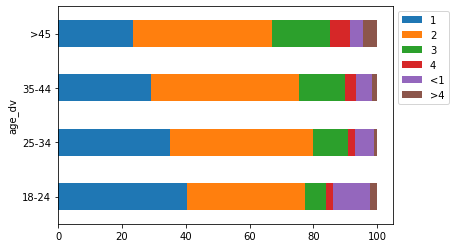

In [191]:
test = df.groupby("age_dv")["cups_dv"].value_counts(normalize=True).unstack() *100

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

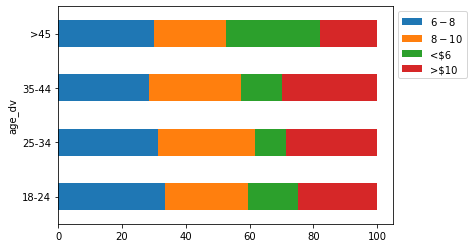

In [190]:
test = df.groupby("age_dv")["most_paid_dv"].value_counts(normalize=True).unstack() *100

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

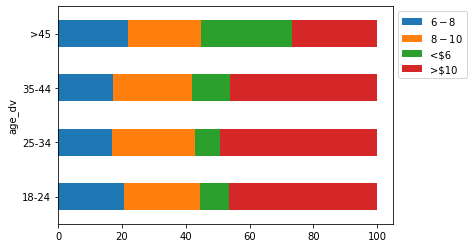

In [189]:
test = df.groupby("age_dv")["most_willing_dv"].value_counts(normalize=True).unstack() *100

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

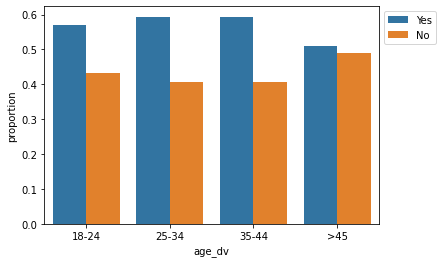

In [207]:
test = df.groupby("age_dv")["value_cafe"].value_counts(normalize=True).to_frame().rename(columns={"value_cafe": "proportion"}).reset_index()
sns.barplot(x='age_dv', y='proportion', hue='value_cafe', data=test) 
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

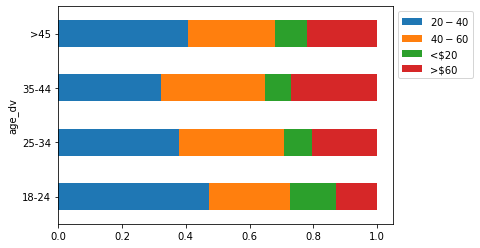

In [186]:
test = df.groupby("age_dv")["total_spend_dv"].value_counts(normalize=True).unstack()

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

In [144]:
df.groupby("age_dv")["add_Flavor syrup"].value_counts(normalize=True).unstack()

add_Flavor syrup,0,1
age_dv,,
18-24,0.913174,0.086826
25-34,0.944134,0.055866
35-44,0.961140,0.038860
>45,0.969626,0.030374


In [145]:
df.groupby("age_dv")["add_dairy alternative"].value_counts(normalize=True).unstack() 

add_dairy alternative,0,1
age_dv,,
18-24,0.589820,0.410180
25-34,0.610180,0.389820
35-44,0.571244,0.428756
>45,0.507009,0.492991


In [148]:
df.groupby("age_dv")["brew_Pod/capsule machine (e.g. Keurig/Nespresso)"].value_counts(normalize=True).unstack()

brew_Pod/capsule machine (e.g. Keurig/Nespresso),0,1
age_dv,,
18-24,0.874251,0.125749
25-34,0.934202,0.065798
35-44,0.920984,0.079016
>45,0.845794,0.154206


In [165]:
df.groupby("age_dv")["where_At a cafe"].value_counts(normalize=True).unstack() 

where_At a cafe,0,1
age_dv,,
18-24,0.595808,0.404192
25-34,0.663563,0.336437
35-44,0.727979,0.272021
>45,0.866822,0.133178


In [160]:
df.groupby("age_dv")["add_No - just black"].value_counts(normalize=True).unstack() 

add_No - just black,0,1
age_dv,,
18-24,0.320359,0.679641
25-34,0.270019,0.729981
35-44,0.331606,0.668394
>45,0.457944,0.542056


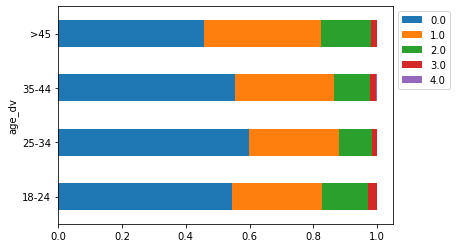

In [183]:
test = df.groupby("age_dv")["add_total"].value_counts(normalize=True).unstack() 

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

In [109]:
df.columns

Index(['submission_id', 'age', 'cups', 'where_drink', 'brew', 'brew_other',
       'purchase', 'purchase_other', 'favorite', 'favorite_specify',
       'additions', 'additions_other', 'dairy', 'sweetener', 'style',
       'strength', 'roast_level', 'caffeine', 'expertise',
       'coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall', 'wfh', 'total_spend',
       'why_drink', 'why_drink_other', 'taste', 'know_source', 'most_paid',
       'most_willing', 'value_cafe', 'spent_equipment', 'value_equipment',
       'gender', 'gender_specify', 'education_level', 'ethnicity_race',
       'ethnici

In [146]:
df.groupby("age_dv")["cups_dv"].describe()

,count,unique,top,freq
age_dv,,,,
18-24,334,6,1,135
25-34,1611,6,2,720
35-44,772,6,2,359
>45,428,6,2,187
